# Opentrons Mass Balance Automation 

## Aniket Chitre, Daniil Bash - AMDM Group

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Set Serial Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Real-time Data

In [3]:
def get_mass(port):
    balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
    balance.write('S\r\n'.encode('utf-8'))
    time.sleep(1)
    result  = balance.read_until('\r\n'.encode('utf-8'))
    value = str(result[7:14].decode("utf-8"))
    if (value.strip() != '-------') and (value.strip() != ''):
        return (True,float(value))
    return (False,-1)

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

-0.002
-0.002
-0.002
-0.002
-0.002
-0.002
-0.002
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.002
-0.003
-0.003
-0.002
-0.002
-0.002
-0.002
-0.002
-0.002
-0.002
-0.002
-0.002
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.006
-0.006
0.974
0.974
0.975
0.976
1.964
1.964
1.963
1.963
2.943
2.943
2.943
2.945
3.919
3.919
3.919
3.919
4.893
4.893
4.893
4.893
5.897
5.897
5.897
5.897
6.872
6.871
6.871
6.871
7.851
7.851
7.851
7.852
7.852
8.855
8.856
8.856
9.86
9.86
9.861
9.861
10.864
10.864
10.864
10.864
11.868
11.868
11.868
11.868
12.852
12.852
12.852
12.852
13.853
13.853
13.854
13.855
14.814
14.814
14.813
14.814
15.774
15.774
15.774
15.775
16.778
16.777
16.775
16.778
17.775
17.775
17.775
17.774
18.774
18.774
18.775
18.774
19.775
19.775
19.775
19.775
20.773
20.773
20.772
20.771
21.766
21.764
21.763
21.764
22.757
22.757
22.758
22.758
23.499
23.499
24.237
24.237
24.237
24.239
25.239
26.243
26.244
26.243
26.241
27.245
27.245
27.244
27.243
28.247
28.244
28.244
28.244
29.247
29.246
29.245
29.245

KeyboardInterrupt: 

In [5]:
results = {'Time': x[:-1], 'Mass': mass}

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,-0.002
1,2,-0.002
2,4,-0.002
3,6,-0.002
4,8,-0.002
...,...,...
1152,2304,60.392
1153,2306,60.391
1154,2308,60.393
1155,2310,60.391


In [11]:
mass_df = pd.read_csv('mass_data/MassProfile_121222_S7-12_run1.csv')

<IPython.core.display.Javascript object>


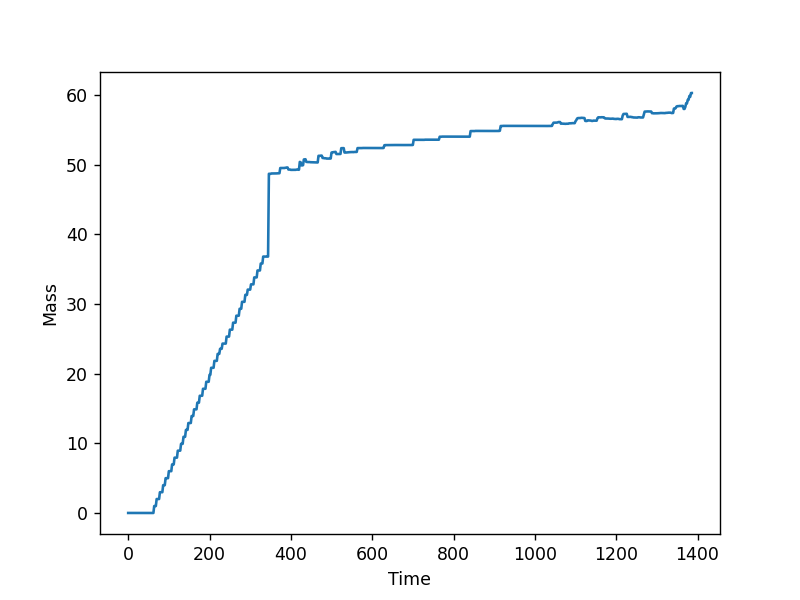

In [12]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_121222_S7-12_run2.csv')